# Q4 - Multi Layer Perceptron

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import seaborn as sns

## part A

In [3]:
houses = pd.read_csv('houses.csv')
houses.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## part B

In [3]:
houses.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
houses.price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

## part C

In [181]:
corr_mat = (houses.iloc[:,1:]).corr()
corr = (corr_mat['price'][1:]).to_frame()
corr = corr.rename(columns={"price": "correlation"})

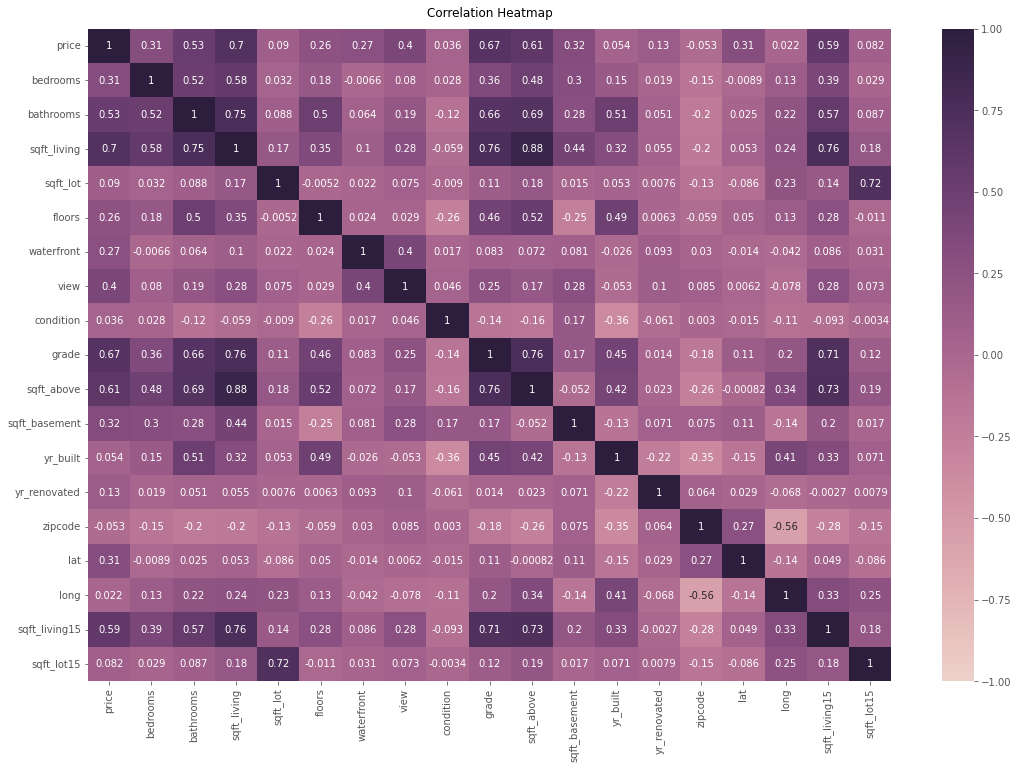

In [182]:
import seaborn as sns
plt.figure(figsize=(18,12))
heatmap = sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True,cmap=sns.cubehelix_palette(as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [183]:
print("highest correlation with price & the feature name:")
corr.loc[corr['correlation'].idxmax()]

highest correlation with price & the feature name:


correlation    0.702035
Name: sqft_living, dtype: float64

## part D

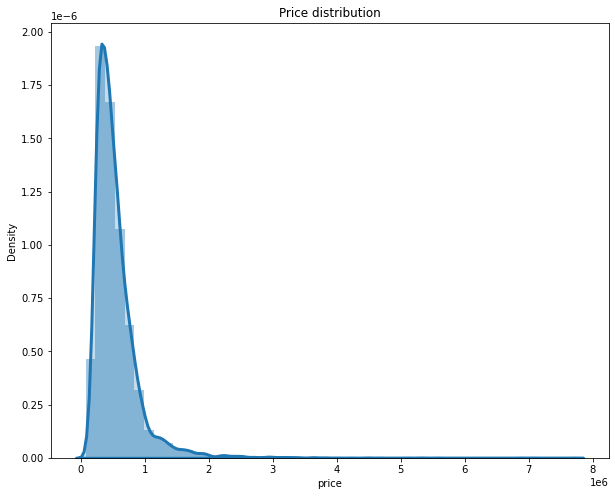

In [5]:
# sns.displot(houses, x="price" , kind="kde", bw_adjust=.25 , height=5 , aspect = 1.8 )
plt.figure(figsize =(10,8))
# houses['price'].plot.kde(bw_method=3)
sns.distplot(houses['price'],kde = True,kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Price distribution');


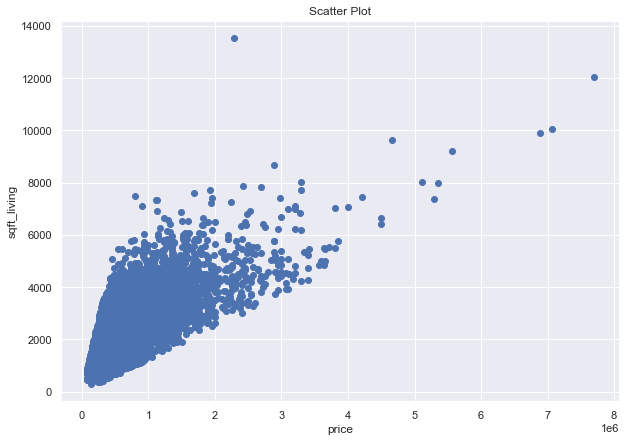

In [209]:
plt.figure(figsize=(10,7))
plt.scatter(houses.price,houses.sqft_living)
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title('Scatter Plot');

## part E

In [4]:
houses['year'] =  houses['date'].str[:4]
houses['month'] =  houses['date'].str[4:6]
del houses['date']

convert_dict = {'year': int,
                'month': int
                }
 

houses = houses.astype(convert_dict)
houses

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [5]:
houses[['year','month']]

,year,month
0,2014,10
1,2014,12
2,2015,2
3,2014,12
4,2015,2
...,...,...
21608,2014,5
21609,2015,2
21610,2014,6
21611,2015,1


## part F

In [6]:
from sklearn.model_selection import train_test_split

X = houses.loc[:,'bedrooms':].to_numpy()
y = houses['price'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## part G

In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

X_train_scaled = scaler1.fit_transform(X_train)
y_train_scaled = scaler2.fit_transform(y_train.reshape(-1, 1))
X_test_scaled = scaler1.transform(X_test)
y_test_scaled = scaler2.transform(y_test.reshape(-1, 1))



## part H

In [125]:
tf.random.set_seed(41)  #first we set random seed
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(15 , activation = "relu"),
                             tf.keras.layers.Dense(7, activation = "relu"),
                             tf.keras.layers.Dense(1, activation = "relu")

])
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])
model.fit( X_train_scaled, y_train_scaled, epochs = 50)

Epoch 1/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0612 - mae: 0.0612
Epoch 2/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0609 - mae: 0.0609
Epoch 3/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0569 - mae: 0.0569
Epoch 4/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0291 - mae: 0.0291
Epoch 5/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0222 - mae: 0.0222
Epoch 6/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0205 - mae: 0.0205
Epoch 7/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0195 - mae: 0.0195
Epoch 8/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0188 - mae: 0.0188
Epoch 9/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0181 - mae: 0.0181
Epoch 10/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0178 - mae: 0.0178
Epoch 11/50
541/541 [============================

### I

#### testing how the Model has trained

In [127]:
(y_train - scaler2.inverse_transform(model.predict(X_train_scaled))).mean()

541/541 [==============================] - 1s 1ms/step


30428.278746294825

In [129]:
(y_test - scaler2.inverse_transform(model.predict(X_test_scaled))).mean()

136/136 [==============================] - 0s 2ms/step


26238.238506245663

In [130]:
y_test[5:10]

array([485000., 340000., 335606., 425000., 490000.])

In [131]:
scaler2.inverse_transform(model.predict(X_test_scaled[5:10]))

1/1 [==============================] - 0s 35ms/step


array([[ 477086.6 ],
       [ 404985.72],
       [ 283238.22],
       [ 558792.  ],
       [1000471.4 ]], dtype=float32)

I

### optimizer = Adadelta

In [133]:
tf.random.set_seed(40)  #first we set random seed
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(15 , activation = "relu"),
                             tf.keras.layers.Dense(7, activation = "relu"),
                             tf.keras.layers.Dense(1, activation = "relu")

])
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.Adadelta(), #stochastic Adadelta
              metrics = ['mae'])
model.fit( X_train_scaled, y_train_scaled, epochs = 50)

Epoch 1/50
541/541 [==============================] - 2s 2ms/step - loss: 0.5131 - mae: 0.5131
Epoch 2/50
541/541 [==============================] - 1s 2ms/step - loss: 0.4909 - mae: 0.4909
Epoch 3/50
541/541 [==============================] - 1s 2ms/step - loss: 0.4644 - mae: 0.4644
Epoch 4/50
541/541 [==============================] - 1s 2ms/step - loss: 0.4350 - mae: 0.4350
Epoch 5/50
541/541 [==============================] - 1s 2ms/step - loss: 0.4034 - mae: 0.4034
Epoch 6/50
541/541 [==============================] - 1s 2ms/step - loss: 0.3701 - mae: 0.3701
Epoch 7/50
541/541 [==============================] - 1s 2ms/step - loss: 0.3356 - mae: 0.3356
Epoch 8/50
541/541 [==============================] - 1s 3ms/step - loss: 0.3005 - mae: 0.3005
Epoch 9/50
541/541 [==============================] - 1s 2ms/step - loss: 0.2655 - mae: 0.2655
Epoch 10/50
541/541 [==============================] - 1s 2ms/step - loss: 0.2311 - mae: 0.2311
Epoch 11/50
541/541 [============================

### optimizer = RMSprop

In [134]:
tf.random.set_seed(39)  #first we set random seed
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(15 , activation = "relu"),
                             tf.keras.layers.Dense(7, activation = "relu"),
                             tf.keras.layers.Dense(1, activation = "relu")

])
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.RMSprop(), #stochastic RMSprop
              metrics = ['mae'])
model.fit( X_train_scaled, y_train_scaled, epochs = 50)

Epoch 1/50
541/541 [==============================] - 4s 2ms/step - loss: 0.0270 - mae: 0.0270
Epoch 2/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0179 - mae: 0.0179
Epoch 3/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0159 - mae: 0.0159
Epoch 4/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0151 - mae: 0.0151
Epoch 5/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0146 - mae: 0.0146
Epoch 6/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0142 - mae: 0.0142
Epoch 7/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0138 - mae: 0.0138
Epoch 8/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0136 - mae: 0.0136
Epoch 9/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0133 - mae: 0.0133
Epoch 10/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0131 - mae: 0.0131
Epoch 11/50
541/541 [============================

### loss functions = MeanAbsoluteError

In [145]:
tf.random.set_seed(30)  #first we set random seed
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(15 , activation = "relu"),
                             tf.keras.layers.Dense(7, activation = "relu"),
                             tf.keras.layers.Dense(1, activation = "relu")

])
model.compile( loss = tf.keras.losses.MeanAbsoluteError(), #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.RMSprop(), #stochastic RMSprop
              metrics = ['mae'])
bestmodel = model.fit( X_train_scaled, y_train_scaled, epochs = 50)


Epoch 1/50
541/541 [==============================] - 2s 2ms/step - loss: 0.0248 - mae: 0.0248
Epoch 2/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0167 - mae: 0.0167
Epoch 3/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0156 - mae: 0.0156
Epoch 4/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0150 - mae: 0.0150
Epoch 5/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0146 - mae: 0.0146
Epoch 6/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0142 - mae: 0.0142
Epoch 7/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0139 - mae: 0.0139
Epoch 8/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0136 - mae: 0.0136
Epoch 9/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0134 - mae: 0.0134
Epoch 10/50
541/541 [==============================] - 1s 2ms/step - loss: 0.0131 - mae: 0.0131
Epoch 11/50
541/541 [============================

### loss functions = BinaryCrossentropy

In [138]:
tf.random.set_seed(37)  #first we set random seed
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(15 , activation = "relu"),
                             tf.keras.layers.Dense(7, activation = "relu"),
                             tf.keras.layers.Dense(1, activation = "relu")

])
model.compile( loss = tf.keras.losses.BinaryCrossentropy(), #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.RMSprop(), #stochastic RMSprop
              metrics = ['mae'])
model.fit( X_train_scaled, y_train_scaled, epochs = 50)


Epoch 1/50
541/541 [==============================] - 2s 2ms/step - loss: 0.2269 - mae: 0.0246
Epoch 2/50
541/541 [==============================] - 1s 2ms/step - loss: 0.2201 - mae: 0.0173
Epoch 3/50
541/541 [==============================] - 1s 3ms/step - loss: 0.2195 - mae: 0.0161
Epoch 4/50
541/541 [==============================] - 1s 2ms/step - loss: 0.2192 - mae: 0.0156
Epoch 5/50
541/541 [==============================] - 1s 2ms/step - loss: 0.2190 - mae: 0.0153
Epoch 6/50
541/541 [==============================] - 1s 2ms/step - loss: 0.2189 - mae: 0.0150
Epoch 7/50
541/541 [==============================] - 1s 3ms/step - loss: 0.2188 - mae: 0.0148
Epoch 8/50
541/541 [==============================] - 1s 2ms/step - loss: 0.2187 - mae: 0.0146
Epoch 9/50
541/541 [==============================] - 1s 2ms/step - loss: 0.2187 - mae: 0.0145
Epoch 10/50
541/541 [==============================] - 1s 2ms/step - loss: 0.2186 - mae: 0.0144
Epoch 11/50
541/541 [============================

### loss functions = MeanSquaredLogarithmicError

In [144]:
tf.random.set_seed(32)  #first we set random seed
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(15 , activation = "relu"),
                             tf.keras.layers.Dense(7, activation = "relu"),
                             tf.keras.layers.Dense(1, activation = "relu")

])
model.compile( loss = tf.keras.losses.MeanSquaredLogarithmicError(), #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.RMSprop(), #stochastic RMSprop
              metrics = ['mae'])
model.fit( X_train_scaled, y_train_scaled, epochs = 50)

Epoch 1/50
541/541 [==============================] - 2s 2ms/step - loss: 0.0014 - mae: 0.0267
Epoch 2/50
541/541 [==============================] - 1s 2ms/step - loss: 6.7724e-04 - mae: 0.0189
Epoch 3/50
541/541 [==============================] - 1s 2ms/step - loss: 5.6790e-04 - mae: 0.0175
Epoch 4/50
541/541 [==============================] - 1s 2ms/step - loss: 5.3113e-04 - mae: 0.0170
Epoch 5/50
541/541 [==============================] - 1s 2ms/step - loss: 5.0856e-04 - mae: 0.0165
Epoch 6/50
541/541 [==============================] - 1s 3ms/step - loss: 4.9333e-04 - mae: 0.0164
Epoch 7/50
541/541 [==============================] - 1s 2ms/step - loss: 4.7722e-04 - mae: 0.0161
Epoch 8/50
541/541 [==============================] - 1s 2ms/step - loss: 4.6212e-04 - mae: 0.0159
Epoch 9/50
541/541 [==============================] - 1s 2ms/step - loss: 4.5328e-04 - mae: 0.0157
Epoch 10/50
541/541 [==============================] - 4s 6ms/step - loss: 4.4076e-04 - mae: 0.0154
Epoch 11/50
5

## part J




In [152]:
tf.random.set_seed(30)  #first we set random seed
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(15 , activation = "relu"),
                             tf.keras.layers.Dense(7, activation = "relu"),
                             tf.keras.layers.Dense(1, activation = "relu")

])
model.compile( loss = tf.keras.losses.MeanAbsoluteError(), #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.RMSprop(), #stochastic RMSprop
              metrics = ['mae'])
history = model.fit( X_train_scaled, y_train_scaled, validation_split=0.25 , epochs = 60)


Epoch 1/60
406/406 [==============================] - 2s 4ms/step - loss: 0.0271 - mae: 0.0271 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 2/60
406/406 [==============================] - 1s 2ms/step - loss: 0.0177 - mae: 0.0177 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 3/60
406/406 [==============================] - 1s 2ms/step - loss: 0.0161 - mae: 0.0161 - val_loss: 0.0166 - val_mae: 0.0166
Epoch 4/60
406/406 [==============================] - 1s 2ms/step - loss: 0.0153 - mae: 0.0153 - val_loss: 0.0155 - val_mae: 0.0155
Epoch 5/60
406/406 [==============================] - 1s 2ms/step - loss: 0.0148 - mae: 0.0148 - val_loss: 0.0142 - val_mae: 0.0142
Epoch 6/60
406/406 [==============================] - 1s 3ms/step - loss: 0.0145 - mae: 0.0145 - val_loss: 0.0141 - val_mae: 0.0141
Epoch 7/60
406/406 [==============================] - 1s 3ms/step - loss: 0.0143 - mae: 0.0143 - val_loss: 0.0139 - val_mae: 0.0139
Epoch 8/60
406/406 [==============================] - 1s 3ms/step - loss: 0.

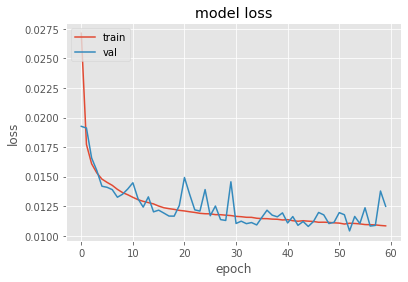

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## part K

In [155]:
y_test[5:10]

array([485000., 340000., 335606., 425000., 490000.])

In [163]:
tempo = scaler2.inverse_transform(model.predict(X_test_scaled[5:10]))
tempo

1/1 [==============================] - 0s 71ms/step


array([[ 453907.22],
       [ 405090.75],
       [ 400137.62],
       [ 528343.75],
       [1559611.4 ]], dtype=float32)

In [159]:
dif = []
for i in range(len(y_test[5:10])):
    dif.append(y_test[5+i] - tempo[i][0])

In [161]:
print("difrrence in the prediction")
dif

difrrence in the prediction


[31092.78125, -65090.75, -64531.625, -103343.75, -1069611.375]